<a href="https://www.kaggle.com/code/eliyahusanti/ps4e6-automl-fedot-xgboost-0-83415?scriptVersionId=181485291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Open source AutoML framework
## https://github.com/aimclub/FEDOT

In [1]:
!pip install fedot fedot[extra]
!pip uninstall xarray -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - done
INFO: pip is looking at multiple versions of salib to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions o

In [2]:
import pandas as pd
from fedot.api.main import Fedot
from fedot.core.pipelines.pipeline_builder import PipelineBuilder

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
sub = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [4]:
train.drop(columns=["id"], inplace=True)
test.drop(columns=["id"], inplace=True)

In [5]:
auto_model = Fedot(
    problem="classification",
    metric=["precision", "accuracy", "roc_auc"],
    preset="best_quality",
    with_tuning=True,
    timeout=5,
    cv_folds=10,
    seed=42,
    n_jobs=4,
    logging_level=10,
    initial_assumption=PipelineBuilder()
    .add_node(
        "xgboost",
    )
    .build(),
    use_pipelines_cache=False,
    use_auto_preprocessing=False
)

2024-06-04 14:55:07,083 - Unknown integration target: 
2024-06-04 14:55:11,236 - Unknown integration target: 
2024-06-04 14:55:15,690 - Unknown integration target: 
2024-06-04 14:55:19,959 - Unknown integration target: 
2024-06-04 14:55:24,084 - Unknown integration target: 
2024-06-04 14:55:33,280 - Unknown integration target: 
2024-06-04 14:55:42,278 - Unknown integration target: 
2024-06-04 14:55:51,076 - Unknown integration target: 
2024-06-04 14:55:51,997 - Unknown integration target: 
2024-06-04 14:55:51,999 - Unknown integration target: 


In [6]:
auto_model.fit(features=train, target="Target")

2024-06-04 14:56:44,913 - AssumptionsHandler - Initial pipeline fitting started
2024-06-04 14:57:09,426 - PipelineNode - Trying to fit pipeline node with operation: xgboost
2024-06-04 14:57:30,323 - PipelineNode - Obtain prediction in pipeline node by operation: xgboost
2024-06-04 14:57:30,478 - AssumptionsHandler - Initial pipeline was fitted successfully
2024-06-04 14:57:30,481 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 173.3 MiB, max: 324.9 MiB
2024-06-04 14:57:30,588 - ApiComposer - Initial pipeline was fitted in 48.4 sec.
2024-06-04 14:57:30,606 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling'].
2024-06-04 14:57:30,642 - type - Random State: random.getstate() follows...
(3, (2147483648, 3564348608,

{'depth': 1, 'length': 1, 'nodes': [xgboost]}

In [7]:
prediction = auto_model.predict(features=test)

2024-06-04 15:14:16,491 - PipelineNode - Obtain prediction in pipeline node by operation: xgboost


In [8]:
sub.Target = prediction.ravel()
sub.to_csv("submission.csv", index=False)

In [9]:
print(auto_model.return_report().head(10))

                           days  hours  minutes  seconds  milliseconds
Data Definition (fit)         0      0        0       49           926
Data Preprocessing            0      0        9       52           691
Fitting (summary)             0      0       17       22           204
Composing                     0      0        0       48           449
Train Inference               0      0        0       46           277
Tuning (composing)            0      0       15       40           415
Tuning (after)                0      0        0        0             0
Data Definition (predict)     0      0        0        6           139
Predicting                    0      0        0        5           527


2024-06-04 15:14:17,375 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-06-04 15:14:17,377 - findfont: score(FontEntry(fname='/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-06-04 15:14:17,379 - findfont: score(FontEntry(fname='/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-06-04 15:14:17,380 - findfont: score(FontEntry(fname='/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-06-04 15:14:17,382 - findfont: score(FontEntry(fname='/opt/conda/lib/python3.10/site-pa

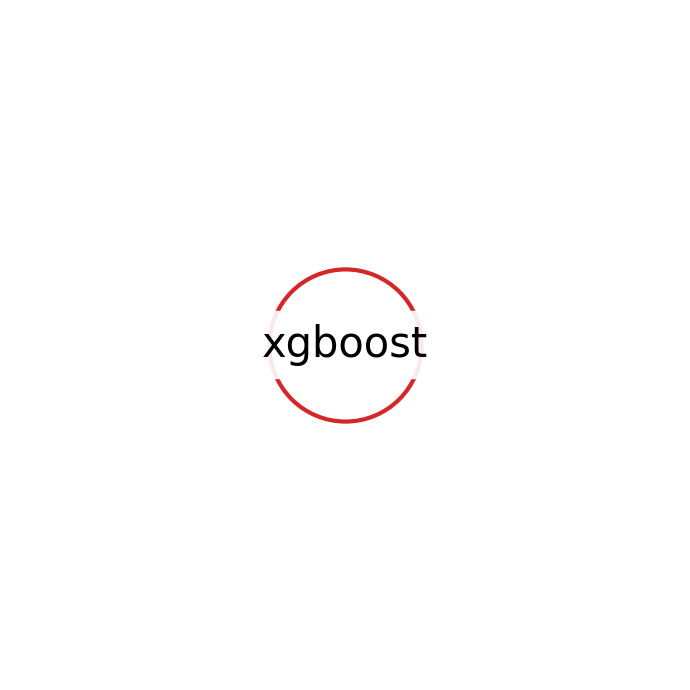

In [10]:
auto_model.current_pipeline.show()